In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [2]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import os
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = "/content/drive/My Drive/data"
print(os.listdir(dataset_path))

Mounted at /content/drive
['validation', 'train']


In [4]:
SIZE = 128

In [5]:
train_images = []
train_labels = []
for directory_path in glob.glob("/content/drive/My Drive/data/train/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

/content/drive/My Drive/data/train/Healthy_Nail
/content/drive/My Drive/data/train/Healthy_Nail/h242_png.rf.40c9fef0389e08455d4109f922c90d1e.jpg
/content/drive/My Drive/data/train/Healthy_Nail/h236_png.rf.9b965a92b463be6bf64538db6d6b4740.jpg
/content/drive/My Drive/data/train/Healthy_Nail/h236_png.rf.a5964c44f4597ae5bfcbb796ce3c75c6.jpg
/content/drive/My Drive/data/train/Healthy_Nail/h201_png.rf.703f8a4793987a72ce39dac07593cb3a.jpg
/content/drive/My Drive/data/train/Healthy_Nail/h270_png.rf.bf8b27a483b7a12f179ac401c7f4eb7b.jpg
/content/drive/My Drive/data/train/Healthy_Nail/h167_png.rf.84a101120c2dcbffeb066ad9cf721b95.jpg
/content/drive/My Drive/data/train/Healthy_Nail/h254_png.rf.e5029515effae0d5529bab0333747afe.jpg
/content/drive/My Drive/data/train/Healthy_Nail/h213_png.rf.a22ba46c86647cb0bde908ffa91e9d2f.jpg
/content/drive/My Drive/data/train/Healthy_Nail/h191_png.rf.93ee2a7519935c3dada4673aed51f1f1.jpg
/content/drive/My Drive/data/train/Healthy_Nail/h32_png.rf.359367efa0a82fcebecb

In [6]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [7]:
# test
test_images = []
test_labels = []
for directory_path in glob.glob("/content/drive/My Drive/data/validation/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

In [8]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Sequential

input_shape = (SIZE, SIZE, 3)

feature_extractor = Sequential([
    Conv2D(32, 3, activation='sigmoid', padding='same', kernel_initializer='he_uniform', input_shape=input_shape),
    BatchNormalization(),
    Conv2D(32, 3, activation='sigmoid', padding='same', kernel_initializer='he_uniform'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, 3, activation='sigmoid', padding='same', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Conv2D(64, 3, activation='sigmoid', padding='same', kernel_initializer='he_uniform'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten()
])

inputs = Input(shape=input_shape)

x = feature_extractor(inputs)

x = Dense(128, activation='sigmoid', kernel_initializer='he_uniform')(x)
predictions = Dense(6, activation='softmax')(x)

cnn_model = Model(inputs=inputs, outputs=predictions)

cnn_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

print(cnn_model.summary())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 65536)             66336     
                                                                 
 dense (Dense)               (None, 128)               8388736   
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 8455846 (32.26 MB)
Trainable params: 8455462 (32.26 MB)
Non-trainable params: 384 (1.50 KB)
_________________________________________________________________
None


In [ ]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=50, batch_size=64, validation_data = (x_test, y_test_one_hot))

Epoch 1/50
59/59 [==============================] - 52s 854ms/step - loss: 1.5234 - accuracy: 0.3747 - val_loss: 2.6206 - val_accuracy: 0.1319
Epoch 2/50
59/59 [==============================] - 50s 853ms/step - loss: 1.3076 - accuracy: 0.4460 - val_loss: 2.2895 - val_accuracy: 0.1319
Epoch 3/50
59/59 [==============================] - 51s 856ms/step - loss: 1.2775 - accuracy: 0.4706 - val_loss: 1.6913 - val_accuracy: 0.3187
Epoch 4/50
59/59 [==============================] - 50s 850ms/step - loss: 1.2203 - accuracy: 0.5019 - val_loss: 1.6303 - val_accuracy: 0.4505
Epoch 5/50
59/59 [==============================] - 51s 857ms/step - loss: 1.1667 - accuracy: 0.5227 - val_loss: 1.9141 - val_accuracy: 0.3297
Epoch 6/50
59/59 [==============================] - 50s 850ms/step - loss: 1.1371 - accuracy: 0.5355 - val_loss: 1.9858 - val_accuracy: 0.2527
Epoch 7/50
59/59 [==============================] - 50s 851ms/step - loss: 1.0909 - accuracy: 0.5636 - val_loss: 1.6875 - val_accuracy: 0.4066

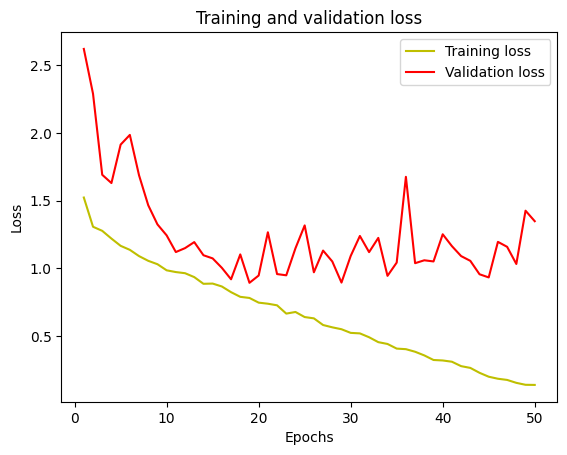

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

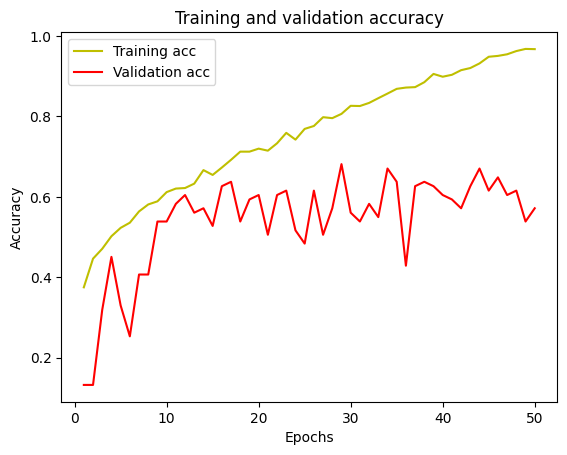

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

3/3 [==============================] - 0s 79ms/step


[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0  5  1  1  3  0  0  0  0  0  0]
 [ 0 18  0  0  0  2  0  0  0  0  0  0]
 [ 3  0  6  0  0  3  0  0  0  0  0  0]
 [ 3  0  0  6  0  0  0  0  0  0  0  0]
 [ 8  0  0  4  2  2  0  0  0  0  0  0]
 [ 1  0  3  0  0 12  0  0  0  0  0  0]]


<Axes: >

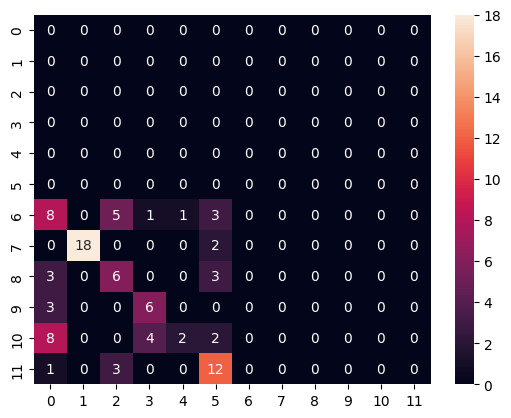

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 34ms/step
The prediction for this image is:  ['/content/drive/My Drive/data/train/Onychogryphosis']
The actual label for this image is:  /content/drive/My Drive/data/validation/pitting


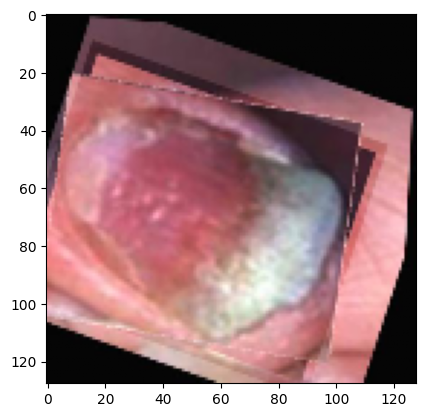

In [19]:
n=18
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
prediction = np.argmax(cnn_model.predict(input_img))
prediction = le.inverse_transform([prediction])
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [20]:
X_for_RF = feature_extractor.predict(x_train)

117/117 [==============================] - 10s 86ms/step


In [21]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [22]:
RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

RandomForestClassifier(n_estimators=50, random_state=42)

In [23]:
X_test_feature = feature_extractor.predict(x_test)
prediction_RF = RF_model.predict(X_test_feature)
prediction_RF = le.inverse_transform(prediction_RF)

3/3 [==============================] - 0s 77ms/step


In [24]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.0


[[ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 7  0  6  1  2  2  0  0  0  0  0  0]
 [ 0 17  0  0  0  3  0  0  0  0  0  0]
 [ 2  0  8  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  8  1  0  0  0  0  0  0  0]
 [ 3  0  0  2 11  0  0  0  0  0  0  0]
 [ 3  0  0  1  0 12  0  0  0  0  0  0]]


<Axes: >

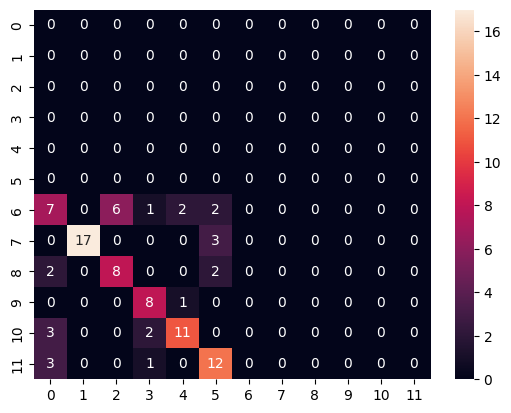

In [25]:
cm = confusion_matrix(test_labels, prediction_RF)
print(cm)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 31ms/step
The prediction for this image is:  ['/content/drive/My Drive/data/train/clubbing']
The actual label for this image is:  /content/drive/My Drive/data/validation/clubbing


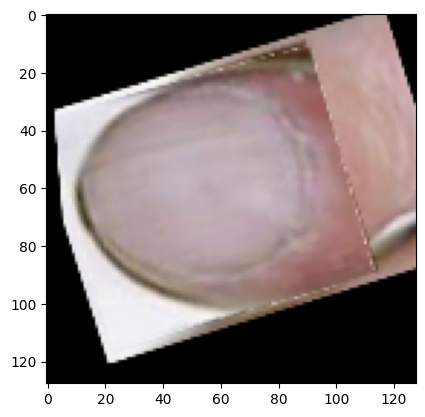

In [26]:
n=60
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

In [27]:
import joblib

In [28]:
joblib.dump(RF_model,'model_joblib')

['model_joblib']

In [29]:
joblib.dump(feature_extractor,'model1_joblib')

['model1_joblib']

In [30]:
import joblib

joblib.dump(RF_model, 'random_forest_model.pkl')

joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']

In [31]:
RF_model = joblib.load('random_forest_model.pkl')

le = joblib.load('label_encoder.pkl')


In [32]:
import joblib
from keras.models import load_model

feature_extractor.save('cnn_model.h5')

joblib.dump(RF_model, 'random_forest_model.pkl')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['random_forest_model.pkl']

In [33]:
from keras.models import load_model

cnn_model = load_model('cnn_model.h5')

RF_model = joblib.load('random_forest_model.pkl')


1/1 [==============================] - 0s 104ms/step
The prediction for this image is:  ['pitting']


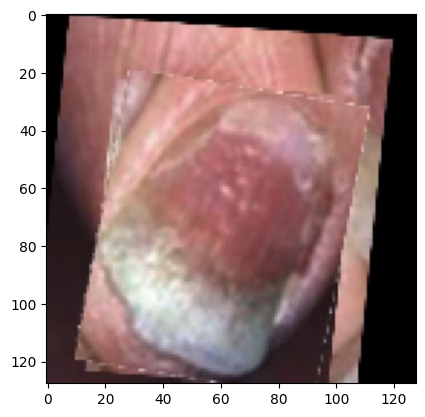

In [35]:
from keras.models import load_model
from sklearn import preprocessing

import joblib
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_path = '/content/drive/My Drive/data/validation/pitting/108_JPG.rf.40d1720769393f88f2f33a1551a3e2f1.jpg'

test_image = []
SIZE = 128
test_labels = ["Acral_Lentiginous_Melanoma", "Healthy_Nail", "Onychogryphosis" ,"blue_finger", "clubbing", "pitting"]
le = preprocessing.LabelEncoder()

test_labels = np.array(test_labels)
le.fit(test_labels)

feature_extractor = load_model('cnn_model.h5')

RF_model = joblib.load('random_forest_model.pkl')

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.resize(img, (SIZE, SIZE))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
test_image.append(img)

test_image = np.array(test_image)

x_test = test_image

x_test = x_test / 255.0

n=0
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_features=feature_extractor.predict(input_img)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])
print("The prediction for this image is: ", prediction_RF)
#print("The actual label for this image is: ", test_labels[n])